<a href="https://colab.research.google.com/github/lastminwarrior-fei/characterizing-latency-performance-in-us-cellular-networks/blob/main/cellular_networks_latency_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cellular Networks Latency EDA
=============================

*Yufei Zhen*

## Introduction


* Exploratory Data Analysis (EDA) demo on latency measurement data of US cellular networks
* Download FCC open-source data sets and see data set descriptions: https://www.fcc.gov/reports-research/reports/measuring-broadband-america/measuring-broadband-america-mobile-data



## Environment setup

Mount Google Drive local files:

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # root directory of Drive files in this notebook

Mounted at /content/drive


Import libraries:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Setup notebook to show all outputs, not only the last one:

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Setup pandas to display full dataframe:

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data loading & inspection

### 2021

Load monthly data sets into a list:

In [ ]:
df_months_21 = []

base_path_21 = '/content/drive/MyDrive/2023 UGSRP/MBA raw data/fcc_mba_mobile_data-2021/' # change to local path name

for month in range(1,13):
  path = base_path_21 + 'fcc_mba_mobile_data-2021' + "{:02d}".format(month) + '/curr_mobile_latency-2021' + "{:02d}".format(month) + '.csv'
  df_month = pd.read_csv(path)
  df_months_21.append(df_month)

<ipython-input-5-5a6862c42d52>:7: DtypeWarning: Columns (79,80,81,82) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-5-5a6862c42d52>:7: DtypeWarning: Columns (59,62,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-5-5a6862c42d52>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-5-5a6862c42d52>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-5-5a6862c42d52>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_cs

Generate aggregated dataframe of 2021:

In [ ]:
df_21 = pd.concat(df_months_21, ignore_index=True)

Check the shape of dataframe:

In [ ]:
df_21.shape

(1059808, 162)

### 2022

Load monthly data sets into a list:

In [ ]:
df_months_22 = []

base_path_22 = '/content/drive/MyDrive/2023 UGSRP/MBA raw data/fcc_mba_mobile_data-2022/'

for month in range(1,13):
  path = base_path_22 + 'fcc_mba_mobile_data-2022' + "{:02d}".format(month) + '/curr_mobile_latency-2022' + "{:02d}".format(month) + '.csv'
  df_month = pd.read_csv(path)
  df_months_22.append(df_month)

<ipython-input-8-e2a4231e9423>:7: DtypeWarning: Columns (59,62,79,80,81,82,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-8-e2a4231e9423>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-8-e2a4231e9423>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-8-e2a4231e9423>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_month = pd.read_csv(path)
<ipython-input-8-e2a4231e9423>:7: DtypeWarning: Columns (59,62,79,80,81,82,83,117,121,138,139,140,142,143) have mixed types. Specify dtype option on import

Genarate aggregated daraframe of 2022:

In [ ]:
df_22 = pd.concat(df_months_22, ignore_index=True)

Check shape of dataframe:

In [ ]:
df_22.shape

(414732, 162)

## Data cleansing & preprocessing

### 2021

Keep successful test entries only:

In [ ]:
df_21 = df_21[df_21['successes'] == 1]

Filter out empty columns:

In [ ]:
df_21 = df_21.loc[:, df_21.isnull().sum() != df_21.shape[0]]

Check number of null values in each field:

In [ ]:
df_21.isnull().sum()

target                                                                 0
duration                                                               0
packet_size                                                            0
stream_rate                                                            0
packets_sent                                                           0
packets_received                                                       0
jitter                                                                 0
rtt                                                                    0
successes                                                              0
failures                                                               0
maxmind_isp                                                            5
beginning_cross_traffic_rx_avg_bps                                     0
beginning_cross_traffic_rx_peak_bps                                    9
beginning_cross_traffic_tx_avg_bps                 

Since the duration of each test is 5 seconds (see technical description document), entries with abonormal `rtt` values greater than 5,000,000 (microseconds) should be excluded:

In [ ]:
df_21 = df_21[df_21['rtt'] <= 5e6]

Create additional fields `rtt (ms)` and `jitter (ms)`, to represent round-trip delay and jitter in milliseconds:

In [ ]:
df_21['rtt (ms)'] = df_21['rtt'] / 1000
df_21['jitter (ms)'] = df_21['jitter'] / 1000

<ipython-input-15-a7fd386b45a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['rtt (ms)'] = df_21['rtt'] / 1000
<ipython-input-15-a7fd386b45a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_21['jitter (ms)'] = df_21['jitter'] / 1000


Modify the format of local time field and create new field representing hour of day:

In [ ]:
df_21['dtime_local_trunc'] = pd.to_datetime(df_21['dtime_local_trunc'])
df_21['hour'] = df_21['dtime_local_trunc'].dt.hour

Compute 5-digit FIPS code using `state_fips` and `county_fips` values:

In [ ]:
df_21['fips'] = df_21['state_fips'] * 1000 + df_21['county_fips']

In [ ]:
print("Santinized sample number in 2021:", df_21.shape[0])

Santinized sample number in 2021: 1043231


### 2022

Keep successful test entries only:

In [ ]:
df_22 = df_22[df_22['successes'] == 1]

Filter out empty columns:

In [ ]:
df_22 = df_22.loc[:, df_22.isnull().sum() != df_22.shape[0]]

Check number of null values in each field:

In [ ]:
df_22.isnull().sum()

target                                                                0
duration                                                              0
packet_size                                                           0
stream_rate                                                           0
packets_sent                                                          0
packets_received                                                      0
jitter                                                                0
rtt                                                                   0
successes                                                             0
failures                                                              0
maxmind_isp                                                           2
beginning_cross_traffic_rx_avg_bps                                    0
beginning_cross_traffic_rx_peak_bps                                   4
beginning_cross_traffic_tx_avg_bps                              

Since the duration of each test is 5 seconds (see technical description document), entries with abnormal `rtt` values greater than 5,000,000 (microseconds) should be excluded:

In [ ]:
df_22 = df_22[df_22['rtt'] <= 5e6]

Create additional fields `rtt (ms)` and `jitter (ms)`, to represent round-trip delay and jitter in milliseconds:

In [ ]:
df_22['rtt (ms)'] = df_22['rtt'] / 1000
df_22['jitter (ms)'] = df_22['jitter'] / 1000

<ipython-input-23-e9331a430801>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['rtt (ms)'] = df_22['rtt'] / 1000
<ipython-input-23-e9331a430801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_22['jitter (ms)'] = df_22['jitter'] / 1000


Modify the format of local time field and create new field representing hour of day:

In [ ]:
df_22['dtime_local_trunc'] = pd.to_datetime(df_22['dtime_local_trunc'])
df_22['hour'] = df_22['dtime_local_trunc'].dt.hour

Compute 5-digit FIPS County Code using `state_fips` and `county_fips` values:

In [ ]:
df_22['fips'] = df_22['state_fips'] * 1000 + df_22['county_fips']

In [ ]:
print("Santinized sample number in 2022:", df_22.shape[0])

Santinized sample number in 2022: 407557


## Analysis 1: Urban vs. rural

Download Rural-Urban Continuum Codes: https://www.ers.usda.gov/data-products/rural-urban-continuum-codes/

In [ ]:
df_rucc2013 = pd.read_csv('/content/drive/MyDrive/2023 UGSRP/ruralurbancodes2013.csv') # change to local path name

### 2021

Merge latecy dataframe and RUCC 2013 dataframe base on FIPS code, keeping all entries in the latency dataframe:

In [ ]:
df_21_rucc = df_21.merge(df_rucc2013, how='left', left_on='fips', right_on='FIPS')

Here the RUCC 2013 code serves as an indicator of urbanization level of US counties, the areas become more rural going from 1 to 9. Check how many samples in 2021 mobile latency data set fall into each category:

In [ ]:
df_21_rucc['RUCC_2013'].value_counts()

1.0    559880
2.0    224266
3.0     98112
6.0     61621
4.0     46522
7.0     22049
5.0     15319
9.0      7463
8.0      6826
Name: RUCC_2013, dtype: int64

### 2022

Merge latecy dataframe and RUCC 2013 dataframe base on FIPS code, keeping all entries in the latency dataframe:

In [ ]:
df_22_rucc = df_22.merge(df_rucc2013, how='left', left_on='fips', right_on='FIPS')

Here the RUCC 2013 code serves as an indicator of urbanization level of US counties, the areas become more rural going from 1 to 9. Check how many samples in 2022 mobile latency data set fall into each category:

In [ ]:
df_22_rucc['RUCC_2013'].value_counts()

1.0    202124
2.0    118742
3.0     32644
6.0     18159
4.0     12989
7.0      9566
5.0      4893
8.0      3084
9.0      2546
Name: RUCC_2013, dtype: int64

### Six-tier classification

To ensure each subset has at least 10,000 sample points in subsuquent analysis, some adjacent RUCC 2013 categories are combined into a single "tier". Create a new filed for this "tier" assignment in each year's dataframe:

In [ ]:
df_21_rucc['tier'] = ''
for i in range(df_21.shape[0]):
  if df_21_rucc.at[i, 'RUCC_2013']==1: df_21_rucc.at[i, 'tier'] = 't1'
  elif df_21_rucc.at[i, 'RUCC_2013']==2: df_21_rucc.at[i, 'tier'] = 't2'
  elif df_21_rucc.at[i, 'RUCC_2013']==3: df_21_rucc.at[i, 'tier'] = 't3'
  elif df_21_rucc.at[i, 'RUCC_2013']==4: df_21_rucc.at[i, 'tier'] = 't4'
  elif df_21_rucc.at[i, 'RUCC_2013']<=6: df_21_rucc.at[i, 'tier'] = 't5'
  elif df_21_rucc.at[i, 'RUCC_2013']<=9: df_21_rucc.at[i, 'tier'] = 't6'

In [ ]:
df_22_rucc['tier'] = ''
for i in range(df_22.shape[0]):
  if df_22_rucc.at[i, 'RUCC_2013']==1: df_22_rucc.at[i, 'tier'] = 't1'
  elif df_22_rucc.at[i, 'RUCC_2013']==2: df_22_rucc.at[i, 'tier'] = 't2'
  elif df_22_rucc.at[i, 'RUCC_2013']==3: df_22_rucc.at[i, 'tier'] = 't3'
  elif df_22_rucc.at[i, 'RUCC_2013']==4: df_22_rucc.at[i, 'tier'] = 't4'
  elif df_22_rucc.at[i, 'RUCC_2013']<=6: df_22_rucc.at[i, 'tier'] = 't5'
  elif df_22_rucc.at[i, 'RUCC_2013']<=9: df_22_rucc.at[i, 'tier'] = 't6'

Generate latency box plot by "tiers":

In [ ]:
sns.set_theme(style='whitegrid')

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='tier', ylabel='rtt (ms)'>

Text(0.5, 0, 'RUCC 2013 Tier')

Text(0, 0.5, 'RTT (ms)')

(-20.0, 200.0)

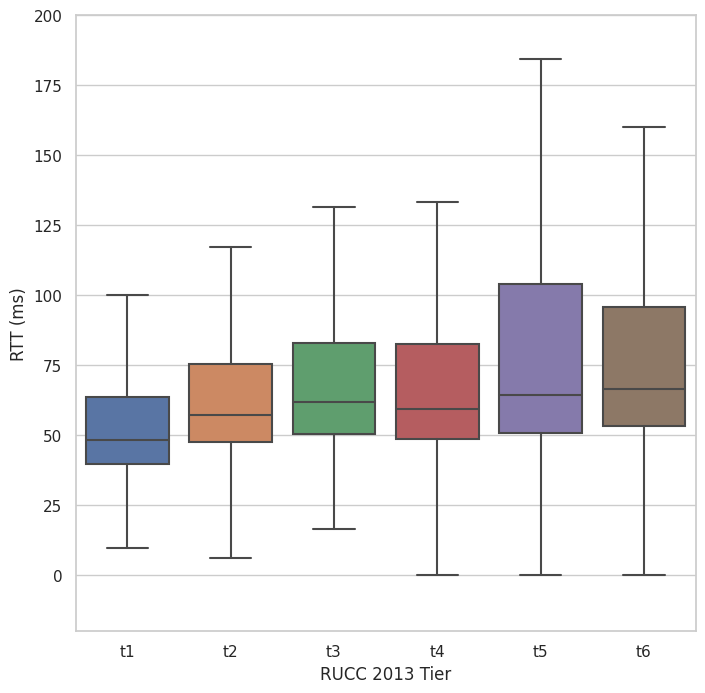

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_21_rucc['tier'],
            y=df_21_rucc['rtt (ms)'],
            showfliers=False, # exclude outliers
            order=['t1', 't2', 't3', 't4', 't5', 't6'] # more rural going from left to right
            )
plt.xlabel('RUCC 2013 Tier')
plt.ylabel('RTT (ms)')
plt.ylim(-20,200)
plt.show()

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='tier', ylabel='rtt (ms)'>

Text(0.5, 0, 'RUCC 2013 Tier')

Text(0, 0.5, 'RTT (ms)')

(-20.0, 200.0)

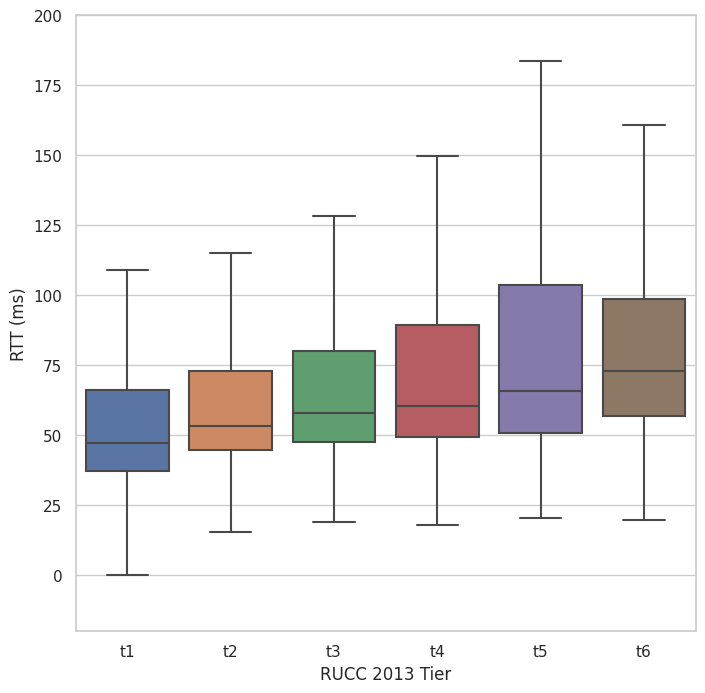

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_22_rucc['tier'],
            y=df_22_rucc['rtt (ms)'],
            showfliers=False, # exclude outliers
            order=['t1', 't2', 't3', 't4', 't5', 't6'] # more rural going from left to right
            )
plt.xlabel('RUCC 2013 Tier')
plt.ylabel('RTT (ms)')
plt.ylim(-20,200)
plt.show()

We can see that samples rural area tend to have higher latency.

Generate line plots to see how median latency changes with hour of day in different tiers (error bands show 95% confidence intervals):

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'RTT (ms)')

([<matplotlib.axis.XTick at 0x7d3662eaeb90>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

(40.0, 90.0)

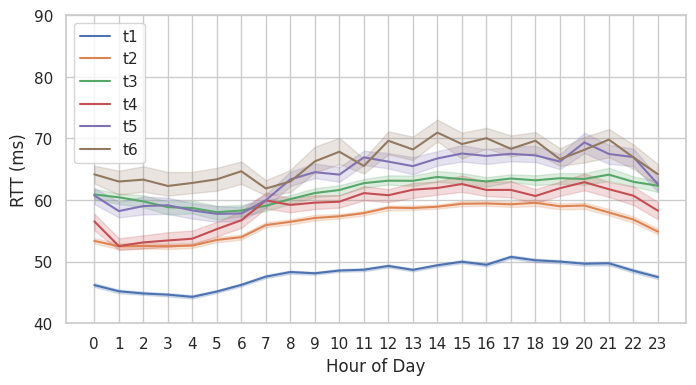

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t1']['hour'],
             y=df_21_rucc[df_21_rucc['tier']=='t1']['rtt (ms)'],
             label='t1',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t2']['hour'],
             y=df_21_rucc[df_21_rucc['tier']=='t2']['rtt (ms)'],
             label='t2',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t3']['hour'],
             y=df_21_rucc[df_21_rucc['tier']=='t3']['rtt (ms)'],
             label='t3',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t4']['hour'],
             y=df_21_rucc[df_21_rucc['tier']=='t4']['rtt (ms)'],
             label='t4',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t5']['hour'],
             y=df_21_rucc[df_21_rucc['tier']=='t5']['rtt (ms)'],
             label='t5',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t6']['hour'],
             y=df_21_rucc[df_21_rucc['tier']=='t6']['rtt (ms)'],
             label='t6',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
plt.xlabel('Hour of Day')
plt.ylabel('RTT (ms)')
plt.xticks(range(0, 24))
plt.ylim(40,90)
plt.legend()
plt.show()

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'RTT (ms)')

([<matplotlib.axis.XTick at 0x7d3662ee32b0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

(40.0, 90.0)

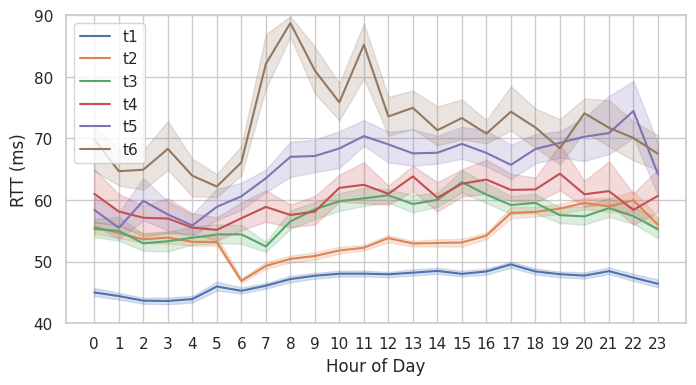

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t1']['hour'],
             y=df_22_rucc[df_22_rucc['tier']=='t1']['rtt (ms)'],
             label='t1',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t2']['hour'],
             y=df_22_rucc[df_22_rucc['tier']=='t2']['rtt (ms)'],
             label='t2',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t3']['hour'],
             y=df_22_rucc[df_22_rucc['tier']=='t3']['rtt (ms)'],
             label='t3',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t4']['hour'],
             y=df_22_rucc[df_22_rucc['tier']=='t4']['rtt (ms)'],
             label='t4',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t5']['hour'],
             y=df_22_rucc[df_22_rucc['tier']=='t5']['rtt (ms)'],
             label='t5',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t6']['hour'],
             y=df_22_rucc[df_22_rucc['tier']=='t6']['rtt (ms)'],
             label='t6',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
plt.xlabel('Hour of Day')
plt.ylabel('RTT (ms)')
plt.xticks(range(0, 24))
plt.ylim(40,90)
plt.legend()
plt.show()

Plots show that samples from peak usage time have higher latency, especially in rural area (upper lines).

## Analysis 2: Signal power

In this part the influence of signal power (in dBm) on latency is explored, under the six-tier classfication of sample points in the previous section.

### 2021

Create a new `signal_power` field by computing average received signal power at beginning and end of test:

In [ ]:
df_21_rucc['signal_power'] = (df_21_rucc['beginning_telephony_cell_strength_received_signal_power'] + df_21_rucc['end_telephony_cell_strength_received_signal_power']) // 2

Plot how latecy change with signal power in different tiers:

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

Text(0.5, 0, 'Signal power (dBm)')

Text(0, 0.5, 'RTT (ms)')

(-120.0, -70.0)

(30.0, 120.0)

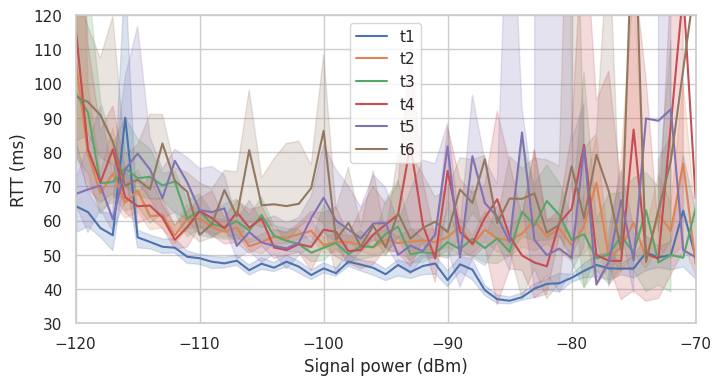

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t1']['signal_power'],
             y=df_21_rucc[df_21_rucc['tier']=='t1']['rtt (ms)'],
             label='t1',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t2']['signal_power'],
             y=df_21_rucc[df_21_rucc['tier']=='t2']['rtt (ms)'],
             label='t2',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t3']['signal_power'],
             y=df_21_rucc[df_21_rucc['tier']=='t3']['rtt (ms)'],
             label='t3',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t4']['signal_power'],
             y=df_21_rucc[df_21_rucc['tier']=='t4']['rtt (ms)'],
             label='t4',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t5']['signal_power'],
             y=df_21_rucc[df_21_rucc['tier']=='t5']['rtt (ms)'],
             label='t5',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_21_rucc[df_21_rucc['tier']=='t6']['signal_power'],
             y=df_21_rucc[df_21_rucc['tier']=='t6']['rtt (ms)'],
             label='t6',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
plt.xlabel('Signal power (dBm)')
plt.ylabel('RTT (ms)')
plt.xlim(-120,-70)
plt.ylim(30,120)
plt.legend()
plt.show()

### 2022

Create a new `signal_power` field by computing average received signal power at beginning and end of test:

In [ ]:
df_22_rucc['signal_power'] = (df_22_rucc['beginning_telephony_cell_strength_received_signal_power'] + df_22_rucc['end_telephony_cell_strength_received_signal_power']) // 2

Plot how latecy change with signal power in different tiers:

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

<Axes: xlabel='signal_power', ylabel='rtt (ms)'>

Text(0.5, 0, 'Signal power (dBm)')

Text(0, 0.5, 'RTT (ms)')

(-120.0, -70.0)

(30.0, 120.0)

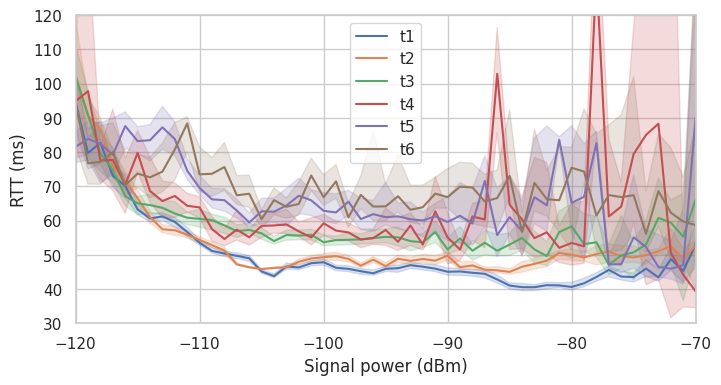

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t1']['signal_power'],
             y=df_22_rucc[df_22_rucc['tier']=='t1']['rtt (ms)'],
             label='t1',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t2']['signal_power'],
             y=df_22_rucc[df_22_rucc['tier']=='t2']['rtt (ms)'],
             label='t2',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t3']['signal_power'],
             y=df_22_rucc[df_22_rucc['tier']=='t3']['rtt (ms)'],
             label='t3',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t4']['signal_power'],
             y=df_22_rucc[df_22_rucc['tier']=='t4']['rtt (ms)'],
             label='t4',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t5']['signal_power'],
             y=df_22_rucc[df_22_rucc['tier']=='t5']['rtt (ms)'],
             label='t5',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
sns.lineplot(x=df_22_rucc[df_22_rucc['tier']=='t6']['signal_power'],
             y=df_22_rucc[df_22_rucc['tier']=='t6']['rtt (ms)'],
             label='t6',
             estimator='median',
             err_style='band',
             errorbar='ci'
             )
plt.xlabel('Signal power (dBm)')
plt.ylabel('RTT (ms)')
plt.xlim(-120,-70)
plt.ylim(30,120)
plt.legend()
plt.show()

### Further discussion

It can be observed that weak signal power (i.e. under -110 dBm) is associated with higher latency. However, the differences of latency-signal power relationship between "tiers" are not very clear. Use box plots to see signal power distributions in each "tier":

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='tier', ylabel='signal_power'>

Text(0.5, 0, 'RUCC 2013 Tier')

Text(0, 0.5, 'Signal power (dBm)')

(-140.0, -50.0)

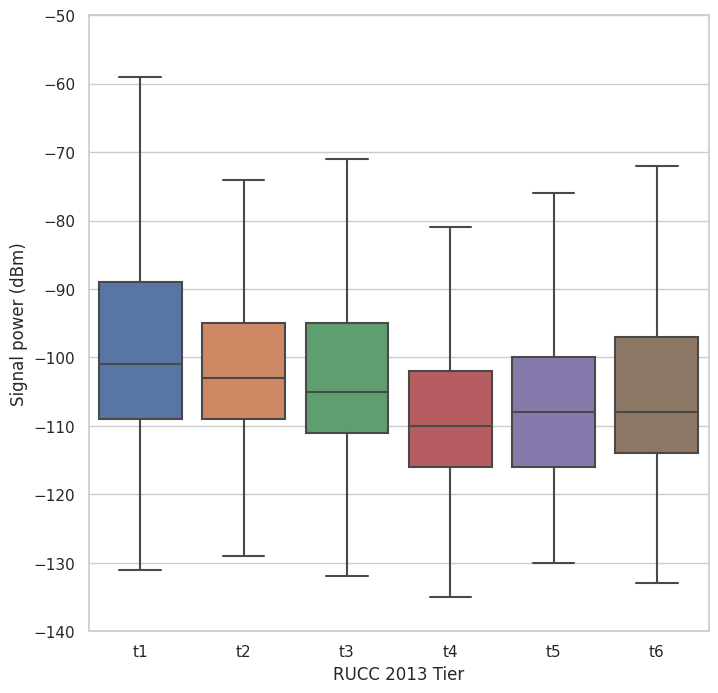

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_21_rucc['tier'],
            y=df_21_rucc['signal_power'],
            showfliers=False, # exclude outliers
            order=['t1', 't2', 't3', 't4', 't5', 't6'] # more rural going from left to right
            )
plt.xlabel('RUCC 2013 Tier')
plt.ylabel('Signal power (dBm)')
plt.ylim(-140, -50)
plt.show()

<Figure size 800x800 with 0 Axes>

<Axes: xlabel='tier', ylabel='signal_power'>

Text(0.5, 0, 'RUCC 2013 Tier')

Text(0, 0.5, 'Signal power (dBm)')

(-140.0, -50.0)

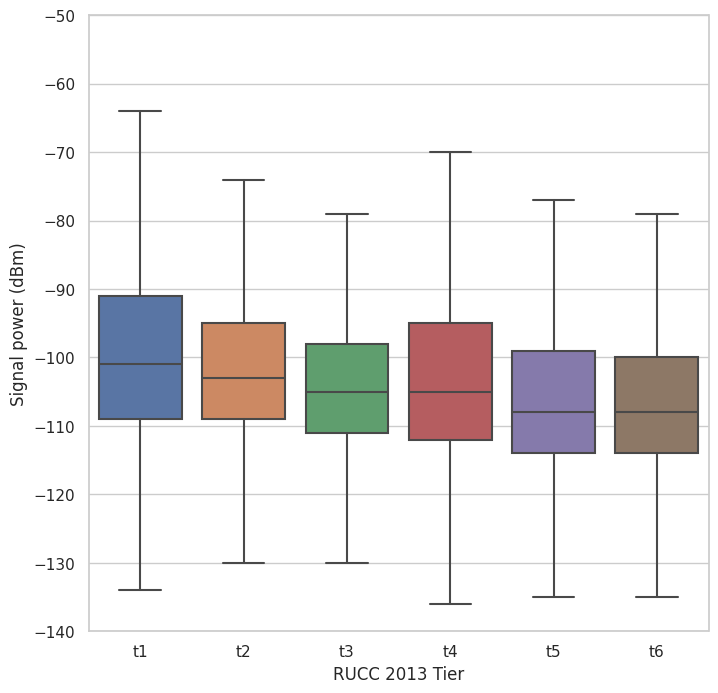

In [ ]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df_22_rucc['tier'],
            y=df_22_rucc['signal_power'],
            showfliers=False, # exclude outliers
            order=['t1', 't2', 't3', 't4', 't5', 't6'] # more rural going from left to right
            )
plt.xlabel('RUCC 2013 Tier')
plt.ylabel('Signal power (dBm)')
plt.ylim(-140, -50)
plt.show()

Plots above further showed that samples in more rural areas are more likely to experience weak signal power, which can be one reason for the urban-rural latency difference discussed in previous part.

## Analysis 3: Handover

A wireless handover takes place when connection is switched between two base stations in celluar network. Although not directly indicated in data set, some handovers can be inferred by comparing the cellular technology reported at both beginning and end of each test sample. If there is a change in cellular connection type (e.g. from 4G to 5G) mid-test, we can say with certainty that a handover had occured.

Note that the great majority of samples are on 4G or 5G, so for simplicity we only are only discussing these two type of connections in the following analysis.

### 2021

Extract subset of handover samples:

In [ ]:
df_21_handover = df_21.loc[df_21['beginning_telephony_cellular_technology'] != df_21['end_telephony_cellular_technology']]

In [ ]:
df_21_handover.shape

(9700, 157)

Further classify samples base on cellular connection type:

In [ ]:
df_21_4g = df_21[(df_21['beginning_telephony_cellular_technology']=='4g') &
          (df_21['end_telephony_cellular_technology']=='4g')]
df_21_5g = df_21[(df_21['beginning_telephony_cellular_technology']=='5g') &
          (df_21['end_telephony_cellular_technology']=='5g')]

In [ ]:
df_21_4g_to_5g = df_21_handover[df_21_handover['beginning_telephony_cellular_technology']=='4g']
df_21_5g_to_4g = df_21_handover[df_21_handover['beginning_telephony_cellular_technology']=='5g']

Plot log-scaled CDF to compare latency/jitter distribution of each subset of samples:

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='rtt', ylabel='Proportion'>

<Axes: xlabel='rtt', ylabel='Proportion'>

<Axes: xlabel='rtt', ylabel='Proportion'>

<Axes: xlabel='rtt', ylabel='Proportion'>

(10, 2000)

Text(0.5, 0, 'RTT (ms)')

Text(0, 0.5, 'CDF')

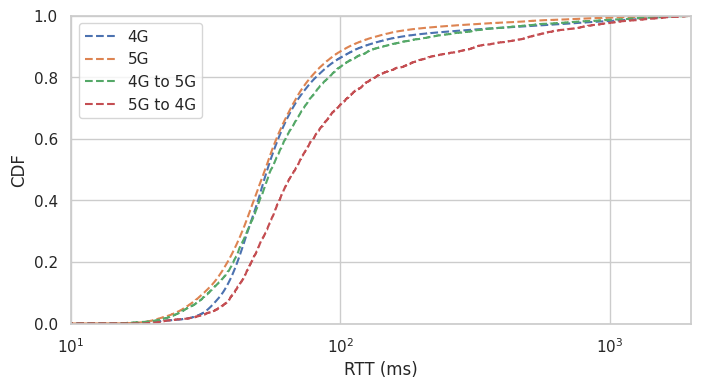

In [ ]:
plt.figure(figsize=(8,4))
sns.ecdfplot(data = df_21_4g['rtt']/1000, label = '4G', linestyle='--')
sns.ecdfplot(data = df_21_5g['rtt']/1000, label = '5G', linestyle='--')
sns.ecdfplot(data=df_21_4g_to_5g['rtt']/1000, label='4G to 5G', linestyle='--')
sns.ecdfplot(data=df_21_5g_to_4g['rtt']/1000, label='5G to 4G', linestyle='--')
plt.xscale('log')
plt.xlim(10,2000)
plt.xlabel('RTT (ms)')
plt.ylabel('CDF')
plt.legend()
plt.show()

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='jitter', ylabel='Proportion'>

<Axes: xlabel='jitter', ylabel='Proportion'>

<Axes: xlabel='jitter', ylabel='Proportion'>

<Axes: xlabel='jitter', ylabel='Proportion'>

(2, 1000)

Text(0.5, 0, 'Jitter (ms)')

Text(0, 0.5, 'CDF')

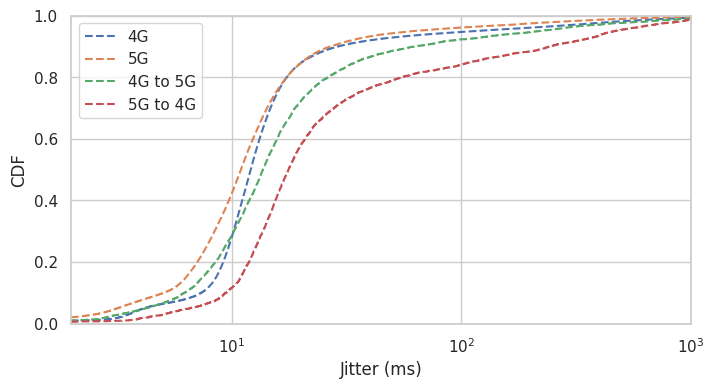

In [ ]:
plt.figure(figsize=(8,4))
sns.ecdfplot(data = df_21_4g['jitter']/1000, label = '4G', linestyle='--')
sns.ecdfplot(data = df_21_5g['jitter']/1000, label = '5G', linestyle='--')
sns.ecdfplot(data=df_21_4g_to_5g['jitter']/1000, label='4G to 5G', linestyle='--')
sns.ecdfplot(data=df_21_5g_to_4g['jitter']/1000, label='5G to 4G', linestyle='--')
plt.xscale('log')
plt.xlim(2,1000)
plt.xlabel('Jitter (ms)')
plt.ylabel('CDF')
plt.legend()
plt.show()

### 2022

Extract subset of handover samples:

In [ ]:
df_22_handover = df_22.loc[df_22['beginning_telephony_cellular_technology'] != df_22['end_telephony_cellular_technology']]

In [ ]:
df_22_handover.shape

(11885, 157)

Further classify samples base on cellular connection type:

In [ ]:
df_22_4g = df_22[(df_22['beginning_telephony_cellular_technology']=='4g') &
          (df_22['end_telephony_cellular_technology']=='4g')]
df_22_5g = df_22[(df_22['beginning_telephony_cellular_technology']=='5g') &
          (df_22['end_telephony_cellular_technology']=='5g')]

In [ ]:
df_22_4g_to_5g = df_22_handover[df_22_handover['beginning_telephony_cellular_technology']=='4g']
df_22_5g_to_4g = df_22_handover[df_22_handover['beginning_telephony_cellular_technology']=='5g']

Plot log-scaled CDF to compare latency/jitter distribution of each subset of samples:

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='rtt', ylabel='Proportion'>

<Axes: xlabel='rtt', ylabel='Proportion'>

<Axes: xlabel='rtt', ylabel='Proportion'>

<Axes: xlabel='rtt', ylabel='Proportion'>

(10, 2000)

Text(0.5, 0, 'RTT (ms)')

Text(0, 0.5, 'CDF')

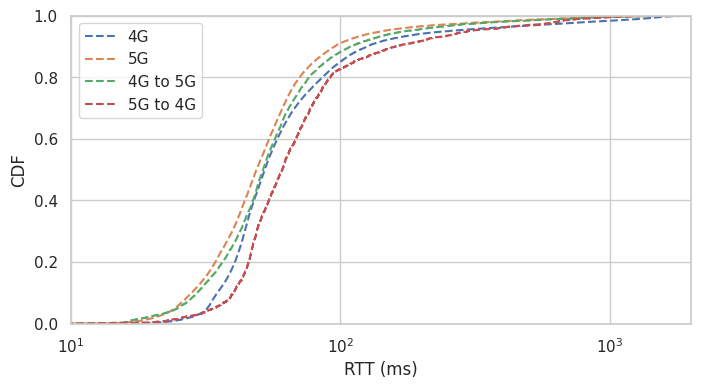

In [ ]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data = df_22_4g['rtt']/1000, label = '4G', linestyle='--')
sns.ecdfplot(data = df_22_5g['rtt']/1000, label = '5G', linestyle='--')
sns.ecdfplot(data=df_22_4g_to_5g['rtt']/1000, label='4G to 5G', linestyle='--')
sns.ecdfplot(data=df_22_5g_to_4g['rtt']/1000, label='5G to 4G', linestyle='--')
plt.xscale('log')
plt.xlim(10,2000)
plt.xlabel('RTT (ms)')
plt.ylabel('CDF')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='jitter', ylabel='Proportion'>

<Axes: xlabel='jitter', ylabel='Proportion'>

<Axes: xlabel='jitter', ylabel='Proportion'>

<Axes: xlabel='jitter', ylabel='Proportion'>

(2, 1000)

Text(0.5, 0, 'Jitter (ms)')

Text(0, 0.5, 'CDF')

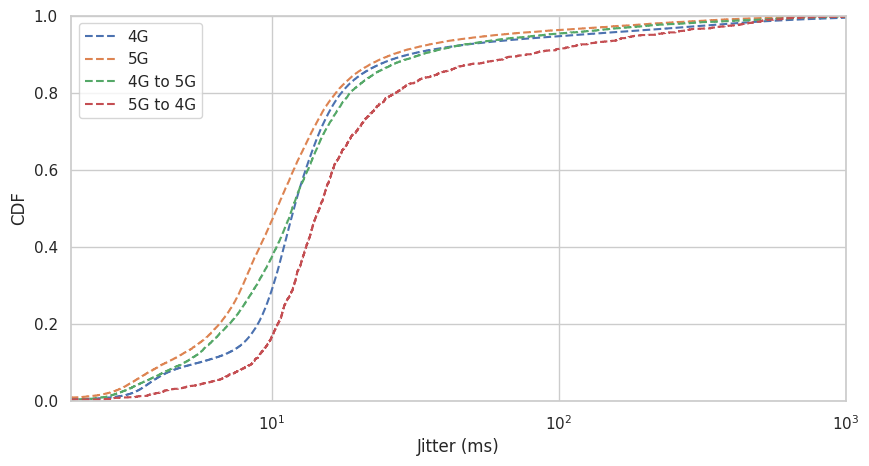

In [ ]:
plt.figure(figsize=(10, 5))
sns.ecdfplot(data = df_22_4g['jitter']/1000, label = '4G', linestyle='--')
sns.ecdfplot(data = df_22_5g['jitter']/1000, label = '5G', linestyle='--')
sns.ecdfplot(data=df_22_4g_to_5g['jitter']/1000, label='4G to 5G', linestyle='--')
sns.ecdfplot(data=df_22_5g_to_4g['jitter']/1000, label='5G to 4G', linestyle='--')
plt.xscale('log')
plt.xlim(2,1000)
plt.xlabel('Jitter (ms)')
plt.ylabel('CDF')
plt.legend()
plt.show()

We can see in both years, some handover samples have significantly worse-than-usual latency performance.

Also notice that 5G has lower latency than 4G, which can be another contributor to the urban-rural differece as 5G is more widely deployed in urban areas.

## Summary statistics

### Median latency overall

2021:

In [ ]:
print(df_21_rucc['rtt (ms)'].median(), "ms")

53.654 ms


2022:

In [ ]:
print(df_22_rucc['rtt (ms)'].median(), "ms")

52.401 ms


### Median latency difference: most rural vs. most urban areas

2021:

In [ ]:
print(df_21_rucc[df_21_rucc['tier']=='t6']['rtt (ms)'].median() - df_21_rucc[df_21_rucc['tier']=='t1']['rtt (ms)'].median(), "ms")

18.038500000000006 ms


2022:

In [ ]:
print(df_22_rucc[df_22_rucc['tier']=='t6']['rtt (ms)'].median() - df_22_rucc[df_22_rucc['tier']=='t1']['rtt (ms)'].median(), "ms")

25.480999999999995 ms


### Median latency difference: most vs. least peak time tests

2021:

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'RTT (ms)')

([<matplotlib.axis.XTick at 0x7d365cb15330>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

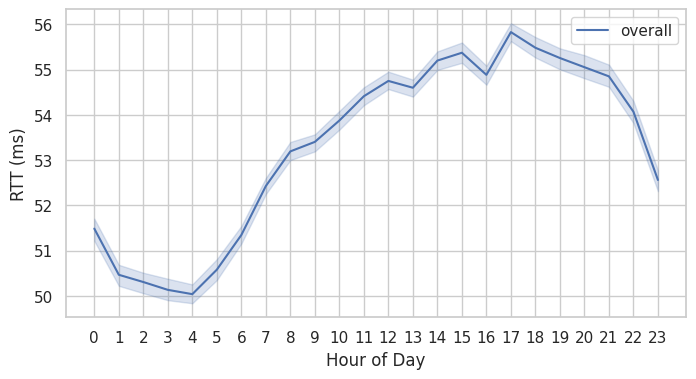

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_21_rucc['hour'],
             y=df_21_rucc['rtt (ms)'],
             label='overall',
             estimator='median',
             err_style='band',
             errorbar='ci',
             )
plt.xlabel('Hour of Day')
plt.ylabel('RTT (ms)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

In [ ]:
print(df_21_rucc[df_21_rucc['hour']==17]['rtt (ms)'].median() - df_21_rucc[df_21_rucc['hour']==4]['rtt (ms)'].median(), "ms")

5.790999999999997 ms


2022:

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='hour', ylabel='rtt (ms)'>

Text(0.5, 0, 'Hour of Day')

Text(0, 0.5, 'RTT (ms)')

([<matplotlib.axis.XTick at 0x7d365cda90c0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

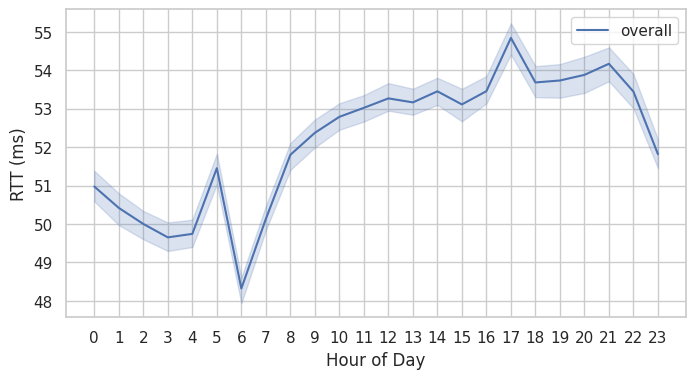

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=df_22_rucc['hour'],
             y=df_22_rucc['rtt (ms)'],
             label='overall',
             estimator='median',
             err_style='band',
             errorbar='ci',
             )
plt.xlabel('Hour of Day')
plt.ylabel('RTT (ms)')
plt.xticks(range(0, 24))
plt.legend()
plt.show()

In [ ]:
print(df_22_rucc[df_22_rucc['hour']==17]['rtt (ms)'].median() - df_22_rucc[df_22_rucc['hour']==6]['rtt (ms)'].median(), "ms")

6.5234999999999985 ms


### Median latency differece: signal power belowe -110 dBm vs. -110 dBm and above


2021:

In [ ]:
print(df_21_rucc[df_21_rucc['signal_power']<-110]['rtt (ms)'].median() - df_21_rucc[df_21_rucc['signal_power']>=-110]['rtt (ms)'].median(), "ms")

13.741499999999995 ms


2022:

In [ ]:
print(df_22_rucc[df_22_rucc['signal_power']<-110]['rtt (ms)'].median() - df_22_rucc[df_22_rucc['signal_power']>=-110]['rtt (ms)'].median(), "ms")

19.909 ms
